In [1]:
import koda
from matplotlib import pyplot as plt
import cv2
import numpy as np
import math
%matplotlib inline

plt.figure(figsize=(20,20))

# Read image
file = 'dataset/IMG_%d.jpg' % 5
img = cv2.imread(file, cv2.IMREAD_COLOR)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.show()

# Load image into koda engine
doc, imgs = koda.load(img)

# Show koda pipeline
#fig, axes = plt.subplots(1, 4, figsize=(20, 20))
#axes[0].imshow(cv2.cvtColor(imgs['edges'], cv2.COLOR_GRAY2RGB))
#axes[1].imshow(cv2.cvtColor(imgs['hough_lines'], cv2.COLOR_BGR2RGB))
#axes[2].imshow(cv2.cvtColor(imgs['corners'], cv2.COLOR_BGR2RGB))
#axes[3].imshow(cv2.cvtColor(imgs['warp'], cv2.COLOR_BGR2RGB))
#plt.plot()

Using TensorFlow backend.
/usr/src/app/koda/edge/network.py:66: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  self.model = Model(input = inputs, output = conv10)


<Figure size 1440x1440 with 0 Axes>

Search for and


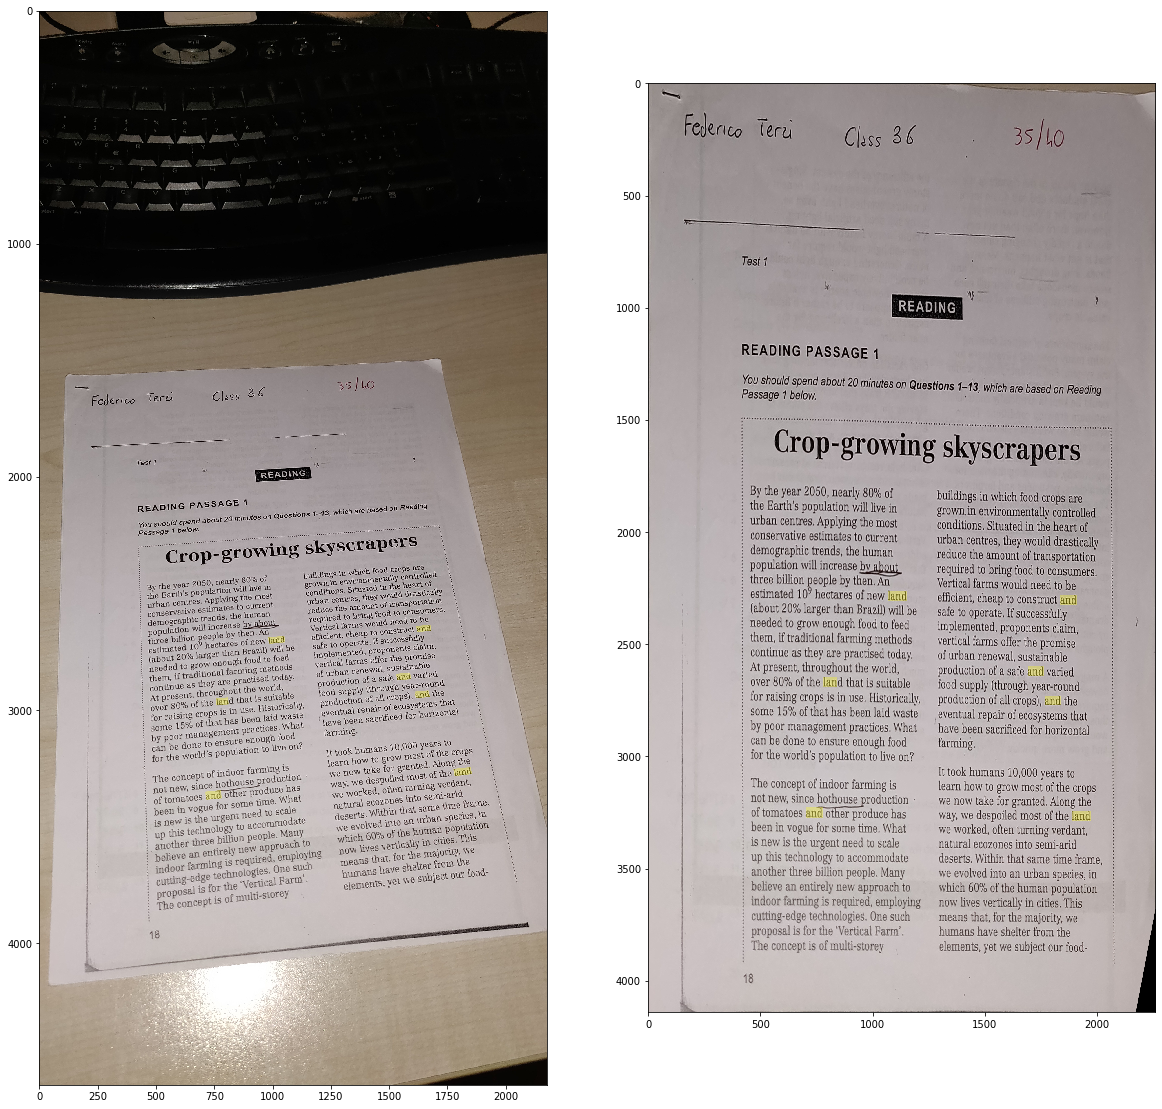

In [2]:
# Find text
word = "and"
print("Search for %s" % word)
hl, hl_warped = doc.findWord(word)

fig, axes = plt.subplots(1, 2, figsize=(20, 20))
axes[0].imshow(cv2.cvtColor(hl, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(hl_warped, cv2.COLOR_BGR2RGB))
plt.savefig('highlight')